# Prediksi Harga Rumah
- menggunakan algoritma multiple linear regression
- data dan kode diperoleh dari https://github.com/adimasmudi/house_prediction
- https://github.com/GilangAgungS/belajar-prediksi-harga-rumah
- Multiple linear regression memiliki beberapa variabel independen

In [213]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [214]:
import pandas as pd
dataset = pd.read_csv('/content/drive/My Drive/latian prediksi rumah/kc_house_data.csv')

## 1. Data Understanding

Memanggil library yang dibutuhkan

In [215]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

membuka dataset

In [216]:
df = pd.read_csv('/content/drive/My Drive/latian prediksi rumah/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Data diatas memuat banyak informasi, namun untuk melakukan prediksi harga rumah membutuhkan beberapa variabel yaitu:
- Variabel independen: 'bedroom', 'bathroom', 'sqft_living', 'grade', yr_built'
- Variabel dependen(yang dipengaruhi oleh variabel independen): 'price'

In [217]:
dataFrame = pd.read_csv('/content/drive/My Drive/latian prediksi rumah/kc_house_data.csv', usecols=['bedrooms', 'bathrooms', 'sqft_living', 'grade','yr_built','price'])
dataFrame

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1.00,1180,7,1955
1,538000.0,3,2.25,2570,7,1951
2,180000.0,2,1.00,770,6,1933
3,604000.0,4,3.00,1960,7,1965
4,510000.0,3,2.00,1680,8,1987
...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,8,2009
21609,400000.0,4,2.50,2310,8,2014
21610,402101.0,2,0.75,1020,7,2009
21611,400000.0,3,2.50,1600,8,2004


In [218]:
#menampilkan jumlah data grade urutkan dari yang terbesar
dataFrame['grade'].value_counts().sort_index(ascending=True)

1        1
3        3
4       29
5      242
6     2038
7     8981
8     6068
9     2615
10    1134
11     399
12      90
13      13
Name: grade, dtype: int64

Penjelasan dari kolom diatas:
- bedrooms : jumlah kamar tidur
- bathrooms : jumlah kamar mandi
- sqft_living : luas ruangan dalam satuan sqft (square feet)
- grade : klasifikasi dari kelas rumah
- yr_built : tahun bangunan
- price : harga rumah ($)

In [219]:
#melihat data teratas
#variabel independen(x) adalah 'bedroom', 'bathroom', 'sqft_living', 'grade', yr_built'.
#variabel dependen(y) adalah 'price'
dataFrame.head(10)

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1.00,1180,7,1955
1,538000.0,3,2.25,2570,7,1951
2,180000.0,2,1.00,770,6,1933
3,604000.0,4,3.00,1960,7,1965
4,510000.0,3,2.00,1680,8,1987
5,1225000.0,4,4.50,5420,11,2001
6,257500.0,3,2.25,1715,7,1995
7,291850.0,3,1.50,1060,7,1963
8,229500.0,3,1.00,1780,7,1960
9,323000.0,3,2.50,1890,7,2003


In [220]:
#melihat data terbawah
dataFrame.tail(10)

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
21603,507250.0,3,2.50,2270,8,2003
21604,429000.0,3,2.00,1490,8,2014
21605,610685.0,4,2.50,2520,9,2014
21606,1007500.0,4,3.50,3510,9,2009
21607,475000.0,3,2.50,1310,8,2008
21608,360000.0,3,2.50,1530,8,2009
21609,400000.0,4,2.50,2310,8,2014
21610,402101.0,2,0.75,1020,7,2009
21611,400000.0,3,2.50,1600,8,2004
21612,325000.0,2,0.75,1020,7,2008


In [221]:
#melihat jumlah baris dan kolom
dataFrame.shape

(21613, 6)

In [222]:
#melihat nama kolom, jumlah data, dan tipe data
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   grade        21613 non-null  int64  
 5   yr_built     21613 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1013.2 KB


dari data diatas dapat dilihat bahwa kolom 'bathrooms' memiliki tipe data float, kita perlu ubah menjadi int karena nilai dari kolom 'bathrooms' harus bilangan bulat.

In [223]:
dataFrame.describe()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,7.656873,1971.005136
std,3.671272e+05,0.930062,0.770163,918.440897,1.175459,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1900.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,13.000000,2015.000000


In [224]:
#melihat nilai dengan jumlah data terbanyak pada kolom 'bedrooms'
dataFrame['bedrooms'].value_counts().sort_index(ascending=True)

0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

- mengubah tipe data kolom 'bathrooms' menjadi int karena data 'bathroom' tidak cocok dengan tipe data float
- mengganti nilai 33 menjadi 3(nilai terbanyak) pada kolom 'bedrooms'

In [225]:
#mengubah tipe data kolom 'bathrooms' menjadi integer(int)
dataFrame['bathrooms'] = dataFrame['bathrooms'].astype(int)
dataFrame.dtypes

price          float64
bedrooms         int64
bathrooms        int64
sqft_living      int64
grade            int64
yr_built         int64
dtype: object

In [226]:
#mengubah nilai 33 pada kolom 'bedroom' menjadi 3
dataFrame['bedrooms'] = dataFrame['bedrooms'].replace(33, 3)

In [227]:
#cek apakah kolom 'bedrooms' dengan nilai 33 sudah dihilangkan
dataFrame[dataFrame['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,grade,yr_built


dari hasil diatas menunjukkan bahwa sudah tidak ada nilai 33 pada kolom 'bedrooms'

## 2. Data Preparation

In [228]:
#melihat data yang kosong
dataFrame.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
grade          0
yr_built       0
dtype: int64

Dari hasil diatas tidak ada data yang kosong, sehingga tidak perlu melakukan penghapusan data

### EDA(Exploratory Data Analysis)
Proses dalam data untuk melihat pola-pola tertentu

In [229]:
dataFrame.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1,1180,7,1955
1,538000.0,3,2,2570,7,1951
2,180000.0,2,1,770,6,1933
3,604000.0,4,3,1960,7,1965
4,510000.0,3,2,1680,8,1987


Melakukan univariate analysis, berfungsi untuk menganalisa tiap variabel tanpa dihubungkan dengan variabel lain.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


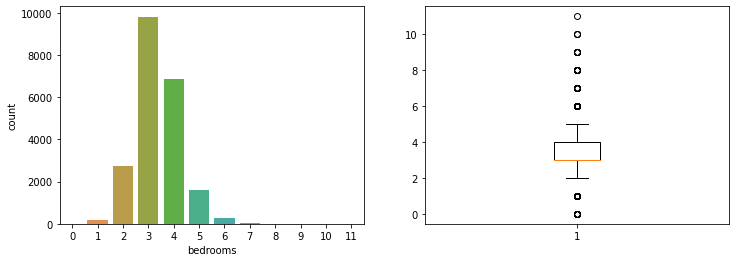

In [231]:
#menggunakan subplot untuk menampilkan
f = plt.figure(figsize=(12,4))

# add_subplot(baris, kolom, posisi)

#plot kiri
f.add_subplot(1,2,1)
sns.countplot(dataFrame['bedrooms'])

#plot kanan
f.add_subplot(1,2,2)
#membuat boxplot untuk kolom 'bedrooms'
plt.boxplot(dataFrame['bedrooms'])
plt.show()


informasi:
- kebanyakan jumlah bedrooms dalam rumah adalah 3 dan 4
- banyak memiliki outliers dilihat dari data diluar garis minimum dan maksimum

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


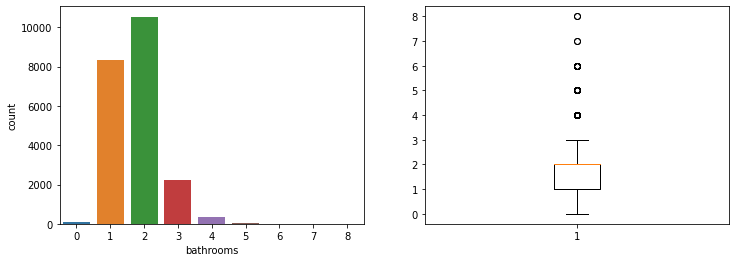

In [232]:
# univariate analysis variabel 'bathrooms'
# melihat persebaran data pada kolom 'bathrooms' dengan plot
f = plt.figure(figsize=(12,4))

# add_subplot(baris, kolom, posisi)
f.add_subplot(1,2,1)
sns.countplot(dataFrame['bathrooms'])

f.add_subplot(1,2,2)
#membuat boxplot untuk kolom 'bathrooms'
plt.boxplot(dataFrame['bathrooms'])
plt.show()

informasi:
- kebanyakan jumlah bathrooms dalam rumah adalah 1 dan 2
- ada beberapa outliers dilihat dari data diluar garis maksimum

In [233]:
#melihat nilai tertinggi pada kolom 'bathrooms'
dataFrame['bathrooms'].value_counts().sort_index(ascending=True)

0       86
1     8355
2    10542
3     2228
4      338
5       48
6       12
7        2
8        2
Name: bathrooms, dtype: int64

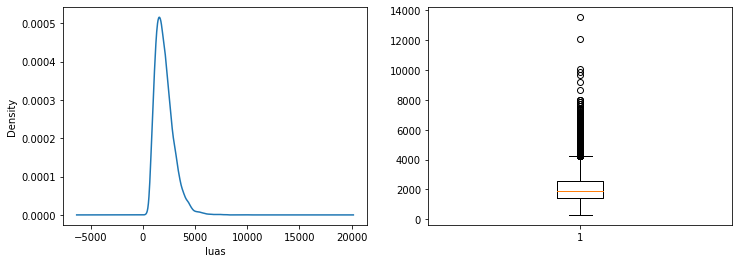

In [234]:
#univariate analysis variabel 'sqft_living'
# melihat persebaran data pada kolom 'sqft_living' dengan plot
from matplotlib.pyplot import xlabel


f = plt.figure(figsize=(12,4))

# add_subplot(baris, kolom, posisi)
f.add_subplot(1,2,1)
dataFrame['sqft_living'].plot(kind='kde')
plt.xlabel('luas')

f.add_subplot(1,2,2)
#membuat boxplot untuk kolom 'sqft_living'
plt.boxplot(dataFrame['sqft_living'])
plt.show()

informasi:
- density(kepadatan) dari luas rumah(sqft_living) ada di angka 2000an
- dilihat dari boxplot, ada banyak outliers di atas garis maksimum

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


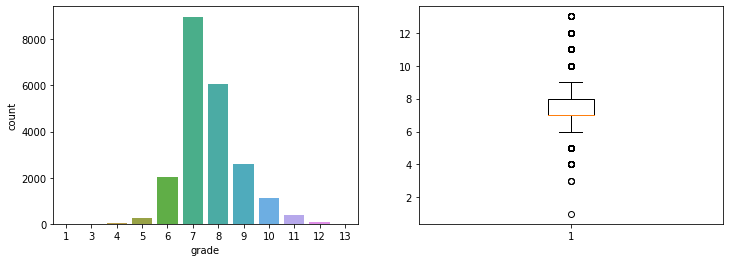

In [235]:
# univariate analysis grade
# melihat distribusi dari grade
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['grade'])

f.add_subplot(1,2,2)
plt.boxplot(df['grade'])
plt.show()

informasi:
- kebanyakan rumah memiliki grade 7 dan 8
- boxplot menunjukkan ada outlier di bawah garis minimum dan diatas garis maksimum

In [236]:
dataFrame['grade'].value_counts().sort_index(ascending = True)

1        1
3        3
4       29
5      242
6     2038
7     8981
8     6068
9     2615
10    1134
11     399
12      90
13      13
Name: grade, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


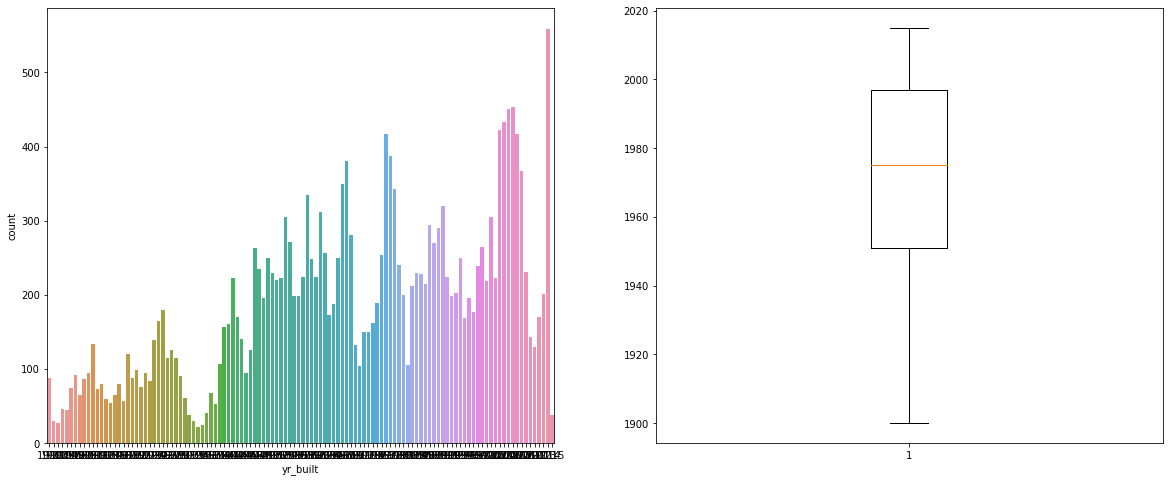

In [237]:
# univariate analysis kolom 'yr_built'
# melihat distribusi dari kolom 'yr_built'

f = plt.figure(figsize=(20,8))

f.add_subplot(1,2,1)
sns.countplot(dataFrame['yr_built'])

f.add_subplot(1,2,2)
plt.boxplot(dataFrame['yr_built'])
plt.show()

informasi:
- rumah dengan 'yr_built' tua cukup sedikit yang dijual
- rumah dengan 'yr_built' paling muda juga cukup sedikit yang dijual
- dari boxplot yang dihasilkan, tidak ada outliers dari kolom tersebut

In [238]:
dataFrame['yr_built'].value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

dari informasi diatas menunjukkan bahwa rumah yang paling banyak dijual adalah rumah dengan 'yr_built' 2014'

In [239]:
dataFrame['yr_built'].max()


2015

In [240]:
dataFrame['yr_built'].min()

1900

In [241]:
dataFrame['yr_built'].value_counts().sort_index(ascending = True)

1900     87
1901     29
1902     27
1903     46
1904     45
       ... 
2011    130
2012    170
2013    201
2014    559
2015     38
Name: yr_built, Length: 116, dtype: int64

Bivariate analysis untuk melihat hubungan masing-masing variabel independen dan variabel dependen


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


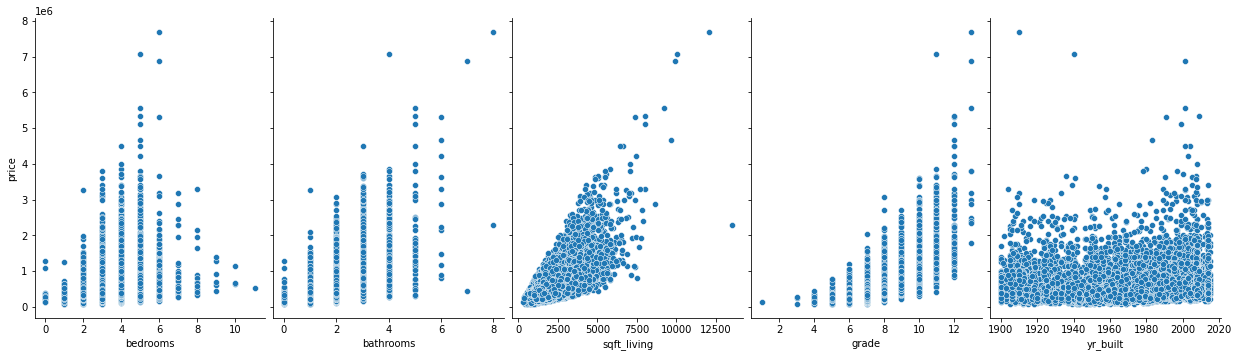

In [242]:
plt.Figure(figsize=(10, 8))
sns.pairplot(data=dataFrame,
             x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'yr_built'], 
             y_vars=['price'],
             size=5,
             aspect=0.7)

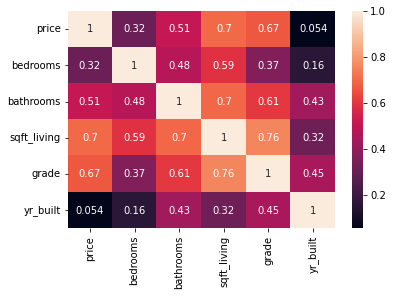

In [243]:
#heatmap untuk dataFrame, melihat korelasi dari variabel independen dan dependen
plt.Figure(figsize=(10, 8))
sns.heatmap(dataFrame.corr(), annot=True)

In [244]:
pip install Jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [245]:
#melihat nilai korelasi dari variabel independen dan dependen
dataFrame.corr().style.background_gradient(cmap='coolwarm')

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
price,1.000000,0.315438,0.510072,0.702035,0.667434,0.054012
bedrooms,0.315438,1.000000,0.480389,0.591471,0.366509,0.159180
bathrooms,0.510072,0.480389,1.000000,0.697875,0.606631,0.433647
sqft_living,0.702035,0.591471,0.697875,1.000000,0.762704,0.318049
grade,0.667434,0.366509,0.606631,0.762704,1.000000,0.446963
yr_built,0.054012,0.159180,0.433647,0.318049,0.446963,1.000000


## 3. Modelling

In [340]:
#melihat 5 data pertama
dataFrame.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1,1180,7,1955
1,538000.0,3,2,2570,7,1951
2,180000.0,2,1,770,6,1933
3,604000.0,4,3,1960,7,1965
4,510000.0,3,2,1680,8,1987


membuat variabel x sebagai variabel independen, variabel diambil dari data yang sudah ada, variabel 'price' dihilangkan karena merupakan variabel dependen

variabel y berisi variabel 'price' sebagai variabel dependen

In [247]:
#x = dataFrame.drop(['price'], axis=1)
#y = dataFrame['price']

In [248]:
from sklearn.model_selection import train_test_split

In [412]:
# X(Independent variables) and y(target variables) 
X = dataFrame[['bedrooms', 'bathrooms',	'sqft_living',	'grade',	'yr_built']].values
y = dataFrame['price'].values

In [403]:
X

array([[   3,    1, 1180,    7, 1955],
       [   3,    2, 2570,    7, 1951],
       [   2,    1,  770,    6, 1933],
       ...,
       [   2,    0, 1020,    7, 2009],
       [   3,    2, 1600,    8, 2004],
       [   2,    0, 1020,    7, 2008]])

split data training dan data testing dengan pembagian 80%(training) dan 20%(testing)

In [413]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

normalisasi data

In [407]:
#from sklearn.preprocessing import StandardScaler

In [408]:
#std = StandardScaler()

In [409]:
#X = std.fit_transform(X)

In [410]:
#cek shape data train dan test
print("x_train: ", X_train.shape)
print("x_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (17290, 5)
x_test:  (4323, 5)
y_train:  (17290,)
y_test:  (4323,)


In [255]:
X_train

array([[   4,    2, 2030,    7, 1973],
       [   3,    2, 1560,    7, 2003],
       [   3,    1, 1570,    7, 1959],
       ...,
       [   3,    2, 1890,    8, 2000],
       [   4,    3, 4020,   11, 2001],
       [   2,    1, 1190,    7, 1912]])

In [256]:
X_test

array([[   3,    1, 1660,    7, 1941],
       [   3,    1,  960,    6, 1944],
       [   3,    2, 2730,    8, 2012],
       ...,
       [   3,    1, 1110,    7, 1964],
       [   4,    4, 2680,    7, 1962],
       [   3,    1, 1980,    7, 1949]])

In [257]:
y_train

array([ 420000.,  269000.,  439995., ...,  465000., 1691000.,  470000.])

In [258]:
y_test

array([530000., 289500., 510000., ..., 255000., 777000., 396000.])

### linear regression

In [259]:
#menggunakan algoritma linear regression untuk menentukan model
from sklearn.linear_model import LinearRegression

linReg = LinearRegression()
linReg.fit(X_train, y_train)

LinearRegression()

In [260]:
#cari nilai koeffisien dan intercept
print("coefficient: ", linReg.coef_)
print("intercept: ", linReg.intercept_)

coefficient:  [-49390.05134464  65531.62546011    182.72887274 131207.61363147
  -3942.08166179]
intercept:  6975638.778442139


In [261]:
#input hasil koeffisien ke dalam tabel dengan kolom "features" dan "coef_value"
#coef_value = pd.DataFrame(model.coef_, x.columns, columns=['coef_value'])
#coef_value


In [262]:
#melihat akuratnya model
linReg.score(X_train, y_train)*100

62.10054115003663

In [263]:
linReg.predict([[3, 2, 2570, 7, 1951]])

array([655597.05154588])

### random forest regression

In [421]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor

RFG = RandomForestRegressor(n_estimators=300, random_state=50)
RFG.fit(X_train, y_train)
RFG.score(X_train, y_train)*100

94.68111961392832

- RFG = RandomForestRegressor(n_estimators=200, max_depth=200)
- akurasi: 94.63265849272376

==============================================

- RFG = RandomForestRegressor(n_estimators=300)
- akurasi = 94.64595082082823

==============================================

- RFG = RandomForestRegressor(n_estimators=300, max_depth=1000)
- akurasi: 94.66362656403754

==============================================

- RFG = RandomForestRegressor(n_estimators=300, random_state=50)
- akurasi: 94.68145042511402

=============================================

akurasi tertinggi sementara di 94.68%, tanpa max_depth dan dengan max_depth=200 tidak berpengaruh



contoh data yang dicoba:

bedrooms,	bathrooms,	sqft_living,	grade,	yr_built
   
- 	3	1	1200	6	1950 || harga: 260000.0


- 	3	1	1150	7	1959 || harga: 464500.0


- 	3	1	1100	6	1962 || harga: 184000.0


- 	4	2	2790	9	1999 || harga: 685100.0


- 	5	2	3200	7	1952 || harga: 1270000.0


- 	4	2	2160	7	1940 || harga: 650000.0


- 	5	2	2720	8	1913 || harga: 752500.0


- 	2	1	1000	7	1947 || harga: 305000.0


- 	3	1	1270	8	2009 || harga: 325000.0


- 	4	3	1960	7	1965 || harga: 604000.0



Mencoba beberapa inputan dan melihat prediksi

In [380]:
print("1.")
print("harga aktual: 260000.0")
harga_pred = RFG.predict([[3,1, 1200, 6, 1950]])
print("harga prediksi:", harga_pred)
print("persentase perbedaan:", ((harga_pred-260000)/260000)*100, "%")

1.
harga aktual: 260000.0
harga prediksi: [267333.3984127]
persentase perbedaan: [2.82053785] %


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [381]:
print("2.")
print("harga aktual: 464500.0")
harga_pred = RFG.predict([[3, 1, 1150, 7, 1959]])
print("harga prediksi:", harga_pred)
print("persentase perbedaan:", ((harga_pred-464500)/464500)*100, "%")

2.
harga aktual: 464500.0
harga prediksi: [388769.77420635]
persentase perbedaan: [-16.30360082] %


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [382]:
print("3.")
print("harga aktual: 184000.0")
harga_pred = RFG.predict([[3, 1, 1100, 6, 1962]])
print("harga prediksi:", harga_pred)
print("persentase perbedaan:", ((harga_pred-184000)/184000)*100, "%")

3.
harga aktual: 184000.0
harga prediksi: [192676.65]
persentase perbedaan: [4.71557065] %


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [383]:
print("4.")
print("harga aktual: 685100.0")
harga_pred = RFG.predict([[4,	2,	2790,	9,	1999]])
print("harga prediksi:", harga_pred)
print("persentase perbedaan:", ((harga_pred-685100)/685100)*100, "%")

4.
harga aktual: 685100.0
harga prediksi: [683711.99126984]
persentase perbedaan: [-0.20259944] %


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [384]:
print("5.")
print("harga aktual: 1270000.0")
harga_pred = RFG.predict([[5,	2,	3200,	7,	1952]])
print("harga prediksi:", harga_pred)
print("persentase perbedaan:", ((harga_pred-1270000)/1270000)*100, "%")

5.
harga aktual: 1270000.0
harga prediksi: [1020157.16666667]
persentase perbedaan: [-19.67266404] %


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [385]:
print("6.")
print("harga aktual: 650000.0")
harga_pred = RFG.predict([[4,	2,	2160,	7,	1940]])
print("harga prediksi:", harga_pred)
print("persentase perbedaan:", ((harga_pred-650000)/650000)*100, "%")

6.
harga aktual: 650000.0
harga prediksi: [638012.33333333]
persentase perbedaan: [-1.84425641] %


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [386]:
print("7.")
print("harga aktual: 752500.0")
harga_pred = RFG.predict([[5,	2,	2720,	8,	1913]])
print("harga prediksi:", harga_pred)
print("persentase perbedaan:", ((harga_pred-752500)/752500)*100, "%")

7.
harga aktual: 752500.0
harga prediksi: [859180.]
persentase perbedaan: [14.17674419] %


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [387]:
print("8.")
print("harga aktual: 305000.0")
harga_pred = RFG.predict([[2,1,1000,7,1947]])
print("harga prediksi:", harga_pred)
print("persentase perbedaan:", ((harga_pred-305000)/305000)*100, "%")

8.
harga aktual: 305000.0
harga prediksi: [322720.33888889]
persentase perbedaan: [5.80994718] %


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [388]:
print("9.")
print("harga aktual: 325000.0")
harga_pred = RFG.predict([[3,1,1270,8,2009]])
print("harga prediksi:", harga_pred)
print("persentase perbedaan:", ((harga_pred-325000)/325000)*100, "%")

9.
harga aktual: 325000.0
harga prediksi: [361786.75010582]
persentase perbedaan: [11.31900003] %


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [389]:
print("10.")
print("harga aktual: 604000.0")
harga_pred = RFG.predict([[4,	3,	1960,	7,	1965]])
print("harga prediksi:", harga_pred)
print("persentase perbedaan:", ((harga_pred-604000)/604000)*100, "%")

10.
harga aktual: 604000.0
harga prediksi: [544493.33333333]
persentase perbedaan: [-9.85209713] %


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [377]:
#print("rata-rata persentase selisih: ", (((3.11901496)+(-15.40181796)+(5.77395229)+(-1.21984747)+(-21.38292651)+(-2.36890205)+(11.44186047)+(5.08651652)+(10.93887424)+(-7.9580574))/10), "%")

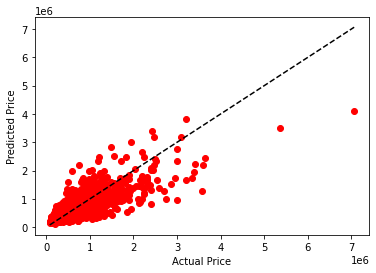

In [427]:
#melihat plot antara harga prediksi dengan harga real

plt.scatter(y_test, RFG.predict(X_test), color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='black')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

### gradient boost regressor

In [266]:
from sklearn.ensemble import GradientBoostingRegressor


#GBoost = GradientBoostingRegressor(n_estimators=170, max_depth=6, learning_rate=0.1)
GBoost = GradientBoostingRegressor(n_estimators=170, max_depth=6, learning_rate=0.1)
GBoost.fit(X_train, y_train)

#melihat akurasi dari model gradient boosting regressor
GBoost.score(X_train, y_train)*100

83.20173781766165

parameter: n_estimator=170, max_depth=2, learning_rate=0.1
akurasi: 68.80663585816413

parameter: n_estimator=170, max_depth=3, learning_rate=0.1
akurasi: 68.6577371703128

parameter: n_estimator=170, max_depth=6, learning_rate=0.1
akurasi: 67.49303041502517

In [267]:
GBoost.predict([[3, 2, 2570, 7, 1951]])

array([620596.83152558])